<a href="https://colab.research.google.com/github/KorvenDalas/AI-ML-FS/blob/main/CW2_AI%26ML_in_FS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)
warnings.filterwarnings("ignore", message=".*KMeans is known to have a memory leak on Windows with MKL.*")

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/KorvenDalas/AI-ML-FS/refs/heads/main/EM.csv")

# Display basic info
df.head()

,Creditscore,Creditscoreindicator,Likelihoodoffailure,CreditlimitGBPGBP,Previouscreditscore,SMEindicator,ReturnonTotalAssets2020,ReturnonTotalAssets2019,ReturnonShareholdersFunds2020,ReturnonShareholdersFunds2019,...,ShareholdersFundsthGBP2020,ShareholdersFundsthGBP2019,TaxationthGBP2020,TaxationthGBP2019,Grossmargin2020,Grossmargin2019,Currentratiox2020,Currentratiox2019,SolvencyratioLiabilitybased2020,SolvencyratioLiabilitybased2019
0,92,Secure,0.9,50000000.0,95.0,No,NaN,5.614489,NaN,10.284360,...,NaN,2110000.0,NaN,-50000.0,NaN,37.888106,NaN,1.224782,NaN,NaN
1,92,Secure,0.9,50000000.0,99.0,No,-0.130484,2.832746,-0.283735,7.000426,...,2713800.0,2582700.0,-14200.0,-58000.0,29.740966,29.250830,1.474780,1.300454,85.144166,67.969367
2,95,Secure,0.9,16574000.0,99.0,No,NaN,3.817802,NaN,18.074145,...,NaN,397247.0,NaN,-19589.0,NaN,13.304340,NaN,0.892335,NaN,26.779674
3,89,Secure,0.9,5380000.0,92.0,No,NaN,-5.702719,NaN,-67.554766,...,NaN,168900.0,NaN,-3300.0,NaN,10.490224,NaN,0.921290,NaN,9.219936
4,99,Secure,0.9,50000000.0,99.0,No,21.144665,26.910621,169.535674,130.534489,...,441500.0,553800.0,-138300.0,-132500.0,38.453425,35.374574,2.058749,1.826697,14.249290,25.969519


# Intro

In [3]:
# Show basic information about the dataset
df_info = {"shape": df.shape,
           "columns": df.columns.tolist(),
           "dtypes": df.dtypes.to_dict(),
           "sample": df.head(5)}
df_info

{'shape': (8176, 72),
 'columns': ['Creditscore',
  'Creditscoreindicator',
  'Likelihoodoffailure',
  'CreditlimitGBPGBP',
  'Previouscreditscore',
  'SMEindicator',
  'ReturnonTotalAssets2020',
  'ReturnonTotalAssets2019',
  'ReturnonShareholdersFunds2020',
  'ReturnonShareholdersFunds2019',
  'ReturnonCapitalEmployed2020',
  'ReturnonCapitalEmployed2019',
  'TurnoverthGBP2020',
  'TurnoverthGBP2019',
  'NetAssetsTurnoverx2020',
  'NetAssetsTurnoverx2019',
  'TradeCreditorsthGBP2020',
  'TradeCreditorsthGBP2019',
  'StockTurnoverx2020',
  'StockTurnoverx2019',
  'StockWIPthGBP2020',
  'StockWIPthGBP2019',
  'NetCurrentAssets2020',
  'NetCurrentAssets2019',
  'FixedAssetsthGBP2020',
  'FixedAssetsthGBP2019',
  'IntangibleAssetsthGBP2020',
  'IntangibleAssetsthGBP2019',
  'TotalAssetsthGBP2020',
  'TotalAssetsthGBP2019',
  'OrdinarySharesthGBP2020',
  'OrdinarySharesthGBP2019',
  'RetainedProfitLossGBP2020',
  'RetainedProfitLossthGBP2019',
  'CurrentAssetsthGBP2020',
  'CurrentAssetst

In [4]:
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df.select_dtypes(exclude=['number']).columns.tolist()

# Check missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

# Summary statistics for numerical features
summary_stats = df[numerical_cols].describe().transpose()

# Count total missing values
total_missing = df.isnull().sum().sum()

{
    "num_numerical_features": len(numerical_cols),
    "num_categorical_features": len(categorical_cols),
    "missing_features": missing_values.to_dict(),
    "total_missing_values": int(total_missing)
}

{'num_numerical_features': 70,
 'num_categorical_features': 2,
 'missing_features': {'CapitalExpenditure2020': 7957,
  'IntangibleAssetsthGBP2020': 7675,
  'LongTermDebtthGBP2020': 7387,
  'InterestCoverx2020': 7249,
  'StockTurnoverx2020': 7247,
  'InterestPaidthGBP2020': 7182,
  'StockWIPthGBP2020': 7102,
  'ShortTermLoansOverdrafts2020': 6819,
  'CapitalExpenditure2019': 6806,
  'SolvencyratioLiabilitybased2020': 6791,
  'TradeCreditorsthGBP2020': 6704,
  'Gearing2020': 6590,
  'Grossmargin2020': 6500,
  'IntangibleAssetsthGBP2019': 6479,
  'OrdinarySharesthGBP2020': 6206,
  'TaxationthGBP2020': 6156,
  'IssuedCapitalthGBP2020': 6149,
  'LongTermDebtthGBP2019': 6099,
  'BankDepositsthGBP2020': 6083,
  'ReturnonShareholdersFunds2020': 5733,
  'InterestCoverx2019': 5430,
  'FixedAssetsthGBP2020': 5393,
  'NetAssetsTurnoverx2020': 5374,
  'Numberofemployees2020': 5318,
  'ReturnonCapitalEmployed2020': 5263,
  'ReturnonTotalAssets2020': 5195,
  'AdministrationExpensesthGBP2020': 5189,
 

In [5]:
# Calculate the total number of values in the dataset
total_values = df.shape[0] * df.shape[1]

# Calculate the percentage of missing values
missing_percentage = (total_missing / total_values) * 100

missing_percentage

np.float64(49.858664927158074)

# EDA

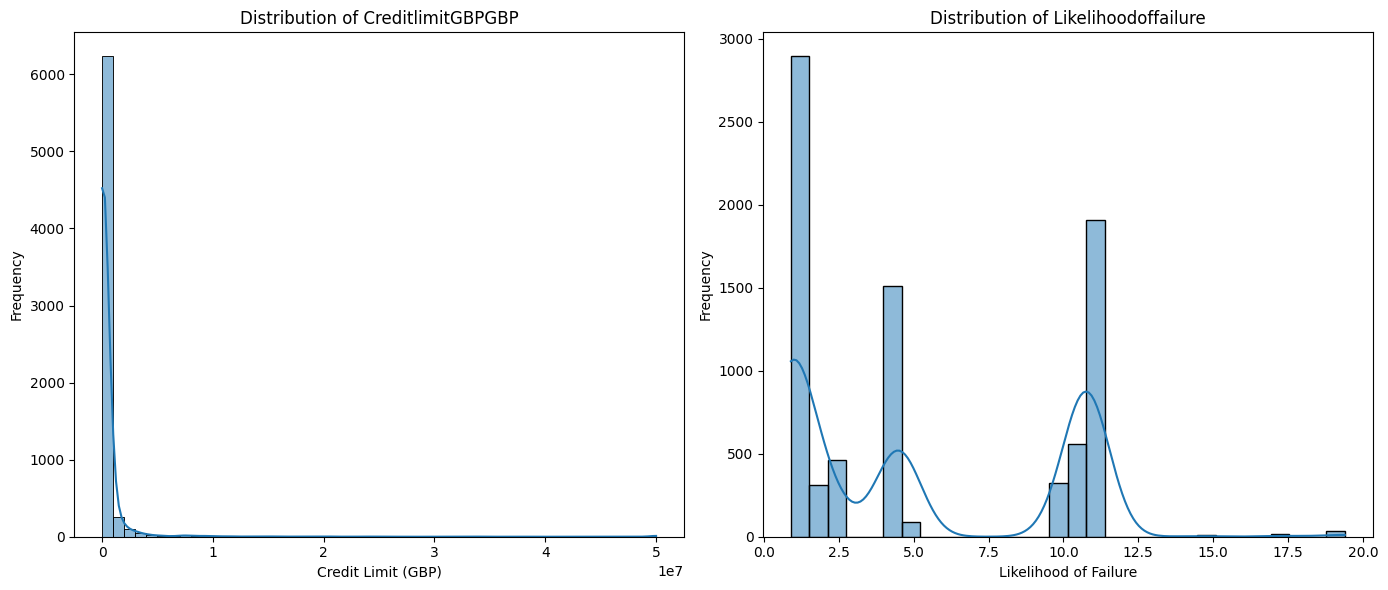

,CreditlimitGBPGBP,Likelihoodoffailure
count,6.771000e+03,8107.000000
mean,5.292997e+05,5.222030
std,2.983264e+06,4.402007
min,5.000000e+02,0.900000
25%,5.000000e+02,0.900000
50%,1.543000e+04,4.500000
75%,2.342970e+05,10.600000
max,5.000000e+07,19.400000


In [6]:
# Select two features for EDA
feature1 = 'CreditlimitGBPGBP'
feature2 = 'Likelihoodoffailure'

# Summary statistics
summary_stats = df[[feature1, feature2]].describe()

# Set up visualizations
plt.figure(figsize=(14, 6))

# Distribution of CreditlimitGBPGBP
plt.subplot(1, 2, 1)
sns.histplot(df[feature1].dropna(), kde=True, bins=50)
plt.title(f'Distribution of {feature1}')
plt.xlabel('Credit Limit (GBP)')
plt.ylabel('Frequency')

# Distribution of Likelihoodoffailure
plt.subplot(1, 2, 2)
sns.histplot(df[feature2].dropna(), kde=True, bins=30)
plt.title(f'Distribution of {feature2}')
plt.xlabel('Likelihood of Failure')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

summary_stats


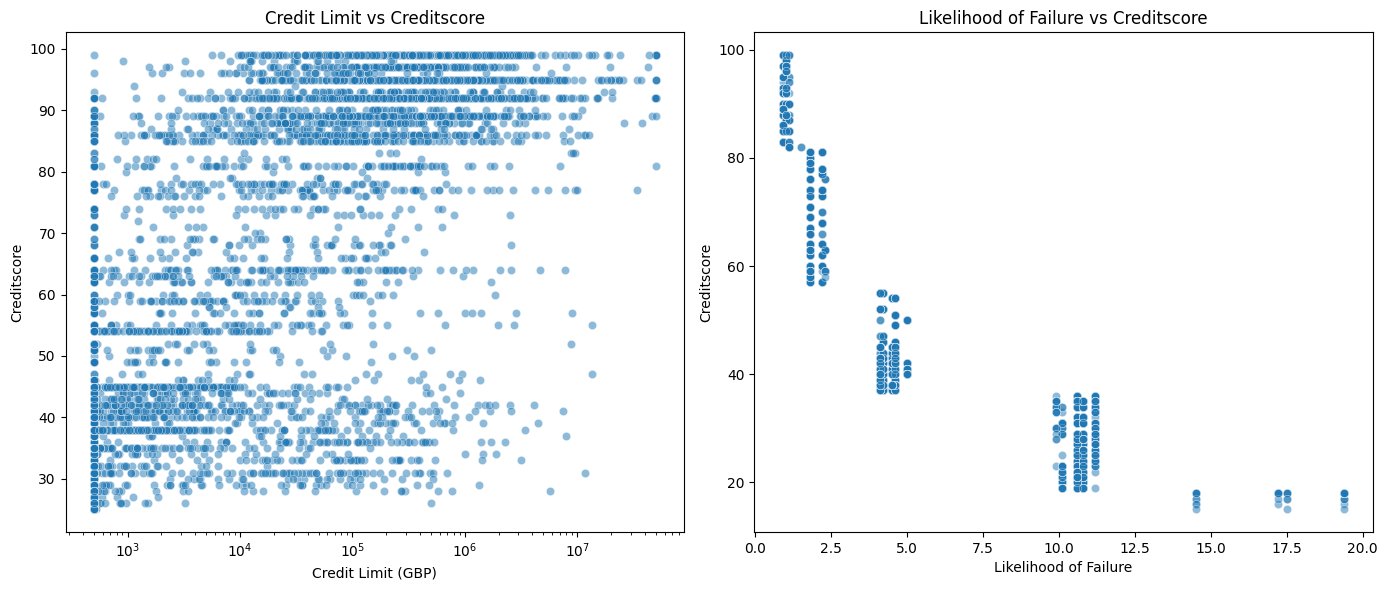

In [7]:
# Set up visualizations for the relationship with Creditscore
plt.figure(figsize=(14, 6))

# Scatter plot: Creditlimit vs Creditscore
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='CreditlimitGBPGBP', y='Creditscore', alpha=0.5)
plt.title('Credit Limit vs Creditscore')
plt.xlabel('Credit Limit (GBP)')
plt.ylabel('Creditscore')
plt.xscale('log')  # Log scale helps with the skew

# Scatter plot: Likelihood of Failure vs Creditscore
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='Likelihoodoffailure', y='Creditscore', alpha=0.5)
plt.title('Likelihood of Failure vs Creditscore')
plt.xlabel('Likelihood of Failure')
plt.ylabel('Creditscore')

plt.tight_layout()
plt.show()


# Data Preprocessing

In [8]:
# Step 1: Create CreditLevel based on mean Creditscore
creditscore_mean = df['Creditscore'].mean()
df['CreditLevel'] = (df['Creditscore'] > creditscore_mean).astype(int)

# Step 2: Keep only numerical features
df_numeric = df.select_dtypes(include=[np.number])

# Drop 'Creditscore' from features (used to create target)
X = df_numeric.drop(columns=['Creditscore', 'CreditLevel'])

# Step 3: Fill missing values with column means
X = X.fillna(X.mean())

# Step 4: Target variable
y = df_numeric['CreditLevel']

# Step 5: Train-test split (70/30) with random_state=123
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Step 6: StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Summary of processed shapes
X.shape, y.shape, X_train_scaled.shape, X_test_scaled.shape


((8176, 69), (8176,), (5723, 69), (2453, 69))

# Decision Tree

In [9]:
# Initialise Decision Tree
dt_model = DecisionTreeClassifier(random_state=123)

# Cross-validation (5-fold) for Decision Tree
dt_scores = cross_val_score(dt_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
dt_mean, dt_std = dt_scores.mean(), dt_scores.std()

{"Decision Tree CV Accuracy": f"{dt_mean:.4f} ± {dt_std:.4f}"}

{'Decision Tree CV Accuracy': '0.9862 ± 0.0034'}

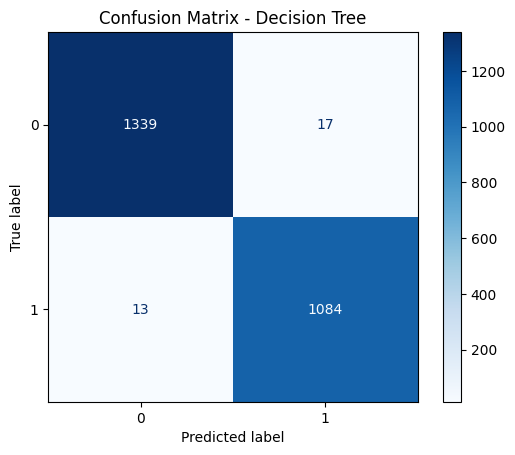

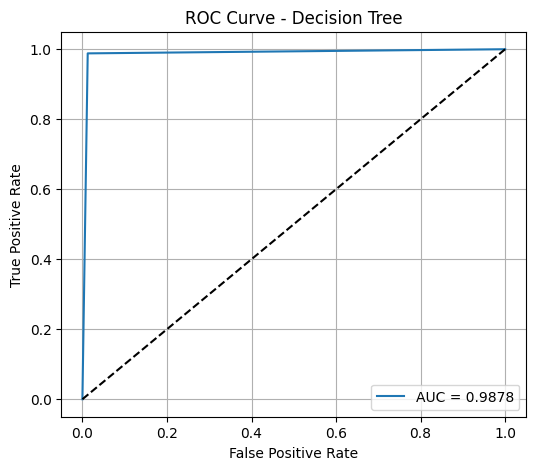

,precision,recall,f1-score,support
0,0.990,0.987,0.989,1356.000
1,0.985,0.988,0.986,1097.000
accuracy,0.988,0.988,0.988,0.988
macro avg,0.987,0.988,0.988,2453.000
weighted avg,0.988,0.988,0.988,2453.000


In [10]:
# Fit Decision Tree model on training data
dt_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = dt_model.predict(X_test_scaled)
y_proba = dt_model.predict_proba(X_test_scaled)[:, 1]  # Probability estimates for ROC

# Classification report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Decision Tree")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend(loc="lower right")
plt.grid()
plt.show()

report_df.round(3)


In [11]:
# Extract feature importances from the trained Decision Tree model
importances = dt_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for better display
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display the top 15 most important features
importance_df.head(15)


,Feature,Importance
0,Likelihoodoffailure,0.970705
4,ReturnonTotalAssets2019,0.002425
10,TurnoverthGBP2019,0.001918
34,CurrentLiabilitiesthGBP2019,0.001687
55,BankDepositsthGBP2020,0.001483
20,NetCurrentAssets2019,0.001311
68,SolvencyratioLiabilitybased2019,0.001238
21,FixedAssetsthGBP2020,0.001212
44,InterestPaidthGBP2019,0.001212
54,EBITDAthGBP2019,0.001172


In [12]:
# Drop 'Likelihoodoffailure' from X and re-do the train-test split and scaling
X_reduced = X.drop(columns=['Likelihoodoffailure'])

# Split again
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reduced, y, test_size=0.3, random_state=123)

# Standardize
scaler_r = StandardScaler()
X_train_r_scaled = scaler_r.fit_transform(X_train_r)
X_test_r_scaled = scaler_r.transform(X_test_r)

# Train new Decision Tree without 'Likelihoodoffailure'
dt_model_r = DecisionTreeClassifier(random_state=123)
dt_model_r.fit(X_train_r_scaled, y_train_r)

# Evaluate new model
y_pred_r = dt_model_r.predict(X_test_r_scaled)
report_r = classification_report(y_test_r, y_pred_r, output_dict=True)
report_r_df = pd.DataFrame(report_r).transpose()

# Feature importances (top 10)
importances_r = dt_model_r.feature_importances_
features_r = X_reduced.columns
importance_r_df = pd.DataFrame({
    'Feature': features_r,
    'Importance': importances_r
}).sort_values(by='Importance', ascending=False).head(10)

report_r_df.round(3), importance_r_df


(              precision  recall  f1-score   support
 0                 0.871   0.894     0.882  1356.000
 1                 0.864   0.837     0.850  1097.000
 accuracy          0.868   0.868     0.868     0.868
 macro avg         0.868   0.865     0.866  2453.000
 weighted avg      0.868   0.868     0.868  2453.000,
                             Feature  Importance
 1               Previouscreditscore    0.560745
 0                 CreditlimitGBPGBP    0.104286
 59       ShareholdersFundsthGBP2019    0.036342
 13          TradeCreditorsthGBP2019    0.033473
 25             TotalAssetsthGBP2019    0.018117
 51  AdministrationExpensesthGBP2019    0.016564
 5     ReturnonShareholdersFunds2019    0.013006
 29      RetainedProfitLossthGBP2019    0.010336
 19             NetCurrentAssets2019    0.010304
 55            BankDepositsthGBP2019    0.010230)

# Support Vector Machine

In [13]:
# Initialise Support Vector Machine (SVM)
svm_model = SVC(kernel='rbf', random_state=123, probability=True)

# Cross-validation (5-fold) for SVM
svm_scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
svm_mean, svm_std = svm_scores.mean(), svm_scores.std()

{"SVM CV Accuracy": f"{svm_mean:.4f} ± {svm_std:.4f}"}

{'SVM CV Accuracy': '0.9796 ± 0.0040'}

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1356
           1       0.98      0.99      0.98      1097

    accuracy                           0.98      2453
   macro avg       0.98      0.99      0.98      2453
weighted avg       0.98      0.98      0.98      2453



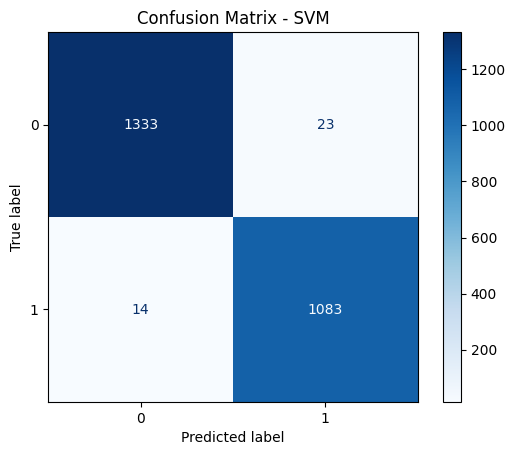

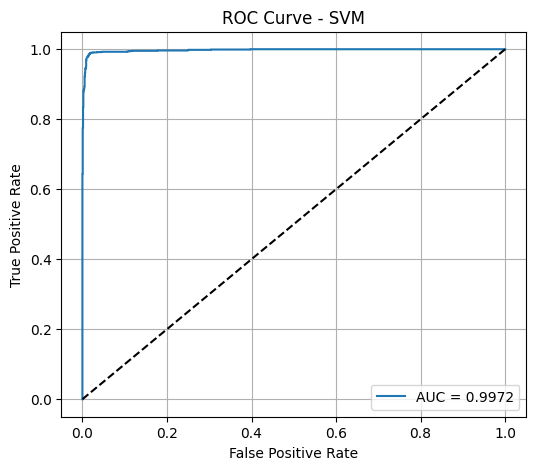

In [14]:
svm_model.fit(X_train_scaled, y_train)
# Predict on test set and get probability estimates
y_pred_svm = svm_model.predict(X_test_scaled)
y_proba_svm = svm_model.predict_proba(X_test_scaled)[:, 1]


# Classification report
print(classification_report(y_test, y_pred_svm))
report_svm = classification_report(y_test, y_pred_svm, output_dict=True)
report_svm_df = pd.DataFrame(report_svm).transpose()
report_svm_df.round(3)

# Confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp_svm.plot(cmap='Blues')
plt.title("Confusion Matrix - SVM")
plt.show()

# ROC Curve
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_proba_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure(figsize=(6, 5))
plt.plot(fpr_svm, tpr_svm, label=f"AUC = {roc_auc_svm:.4f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM")
plt.legend(loc="lower right")
plt.grid()
plt.show()


# Appendix - Deep Exploratory Data Analysys + 4 Model Comparison

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.impute import KNNImputer
from sklearn.inspection import permutation_importance

import warnings
warnings.filterwarnings('ignore')

# Plotting style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")
sns.set_context("talk")

In [16]:
# Load data from online source
df = pd.read_csv("https://raw.githubusercontent.com/KorvenDalas/AI-ML-FS/refs/heads/main/EM.csv")

# Show shape
print(f"Data loaded with {df.shape[0]} rows and {df.shape[1]} columns")

# Preview missing values
print("\nTop columns with missing values:")
print(df.isna().sum().sort_values(ascending=False).head(10))

# Preview the data
df.head()

Data loaded with 8176 rows and 72 columns

Top columns with missing values:
CapitalExpenditure2020             7957
IntangibleAssetsthGBP2020          7675
LongTermDebtthGBP2020              7387
InterestCoverx2020                 7249
StockTurnoverx2020                 7247
InterestPaidthGBP2020              7182
StockWIPthGBP2020                  7102
ShortTermLoansOverdrafts2020       6819
CapitalExpenditure2019             6806
SolvencyratioLiabilitybased2020    6791
dtype: int64


,Creditscore,Creditscoreindicator,Likelihoodoffailure,CreditlimitGBPGBP,Previouscreditscore,SMEindicator,ReturnonTotalAssets2020,ReturnonTotalAssets2019,ReturnonShareholdersFunds2020,ReturnonShareholdersFunds2019,...,ShareholdersFundsthGBP2020,ShareholdersFundsthGBP2019,TaxationthGBP2020,TaxationthGBP2019,Grossmargin2020,Grossmargin2019,Currentratiox2020,Currentratiox2019,SolvencyratioLiabilitybased2020,SolvencyratioLiabilitybased2019
0,92,Secure,0.9,50000000.0,95.0,No,NaN,5.614489,NaN,10.284360,...,NaN,2110000.0,NaN,-50000.0,NaN,37.888106,NaN,1.224782,NaN,NaN
1,92,Secure,0.9,50000000.0,99.0,No,-0.130484,2.832746,-0.283735,7.000426,...,2713800.0,2582700.0,-14200.0,-58000.0,29.740966,29.250830,1.474780,1.300454,85.144166,67.969367
2,95,Secure,0.9,16574000.0,99.0,No,NaN,3.817802,NaN,18.074145,...,NaN,397247.0,NaN,-19589.0,NaN,13.304340,NaN,0.892335,NaN,26.779674
3,89,Secure,0.9,5380000.0,92.0,No,NaN,-5.702719,NaN,-67.554766,...,NaN,168900.0,NaN,-3300.0,NaN,10.490224,NaN,0.921290,NaN,9.219936
4,99,Secure,0.9,50000000.0,99.0,No,21.144665,26.910621,169.535674,130.534489,...,441500.0,553800.0,-138300.0,-132500.0,38.453425,35.374574,2.058749,1.826697,14.249290,25.969519


Loading data...
Data loaded with 8176 rows and 72 columns

Basic information about the dataset:
Number of missing values per column (top 10):
CapitalExpenditure2020             7957
IntangibleAssetsthGBP2020          7675
LongTermDebtthGBP2020              7387
InterestCoverx2020                 7249
StockTurnoverx2020                 7247
InterestPaidthGBP2020              7182
StockWIPthGBP2020                  7102
ShortTermLoansOverdrafts2020       6819
CapitalExpenditure2019             6806
SolvencyratioLiabilitybased2020    6791
dtype: int64

Exploratory Data Analysis for selected features:

Summary statistics:
                                  count           mean           std  \
Creditscore                      8176.0      57.300514  2.973099e+01   
Likelihoodoffailure              8107.0       5.222030  4.402007e+00   
CreditlimitGBPGBP                6771.0  529299.672574  2.983264e+06   
ReturnonTotalAssets2019          6773.0      22.988502  1.054847e+02   
Currentratiox2

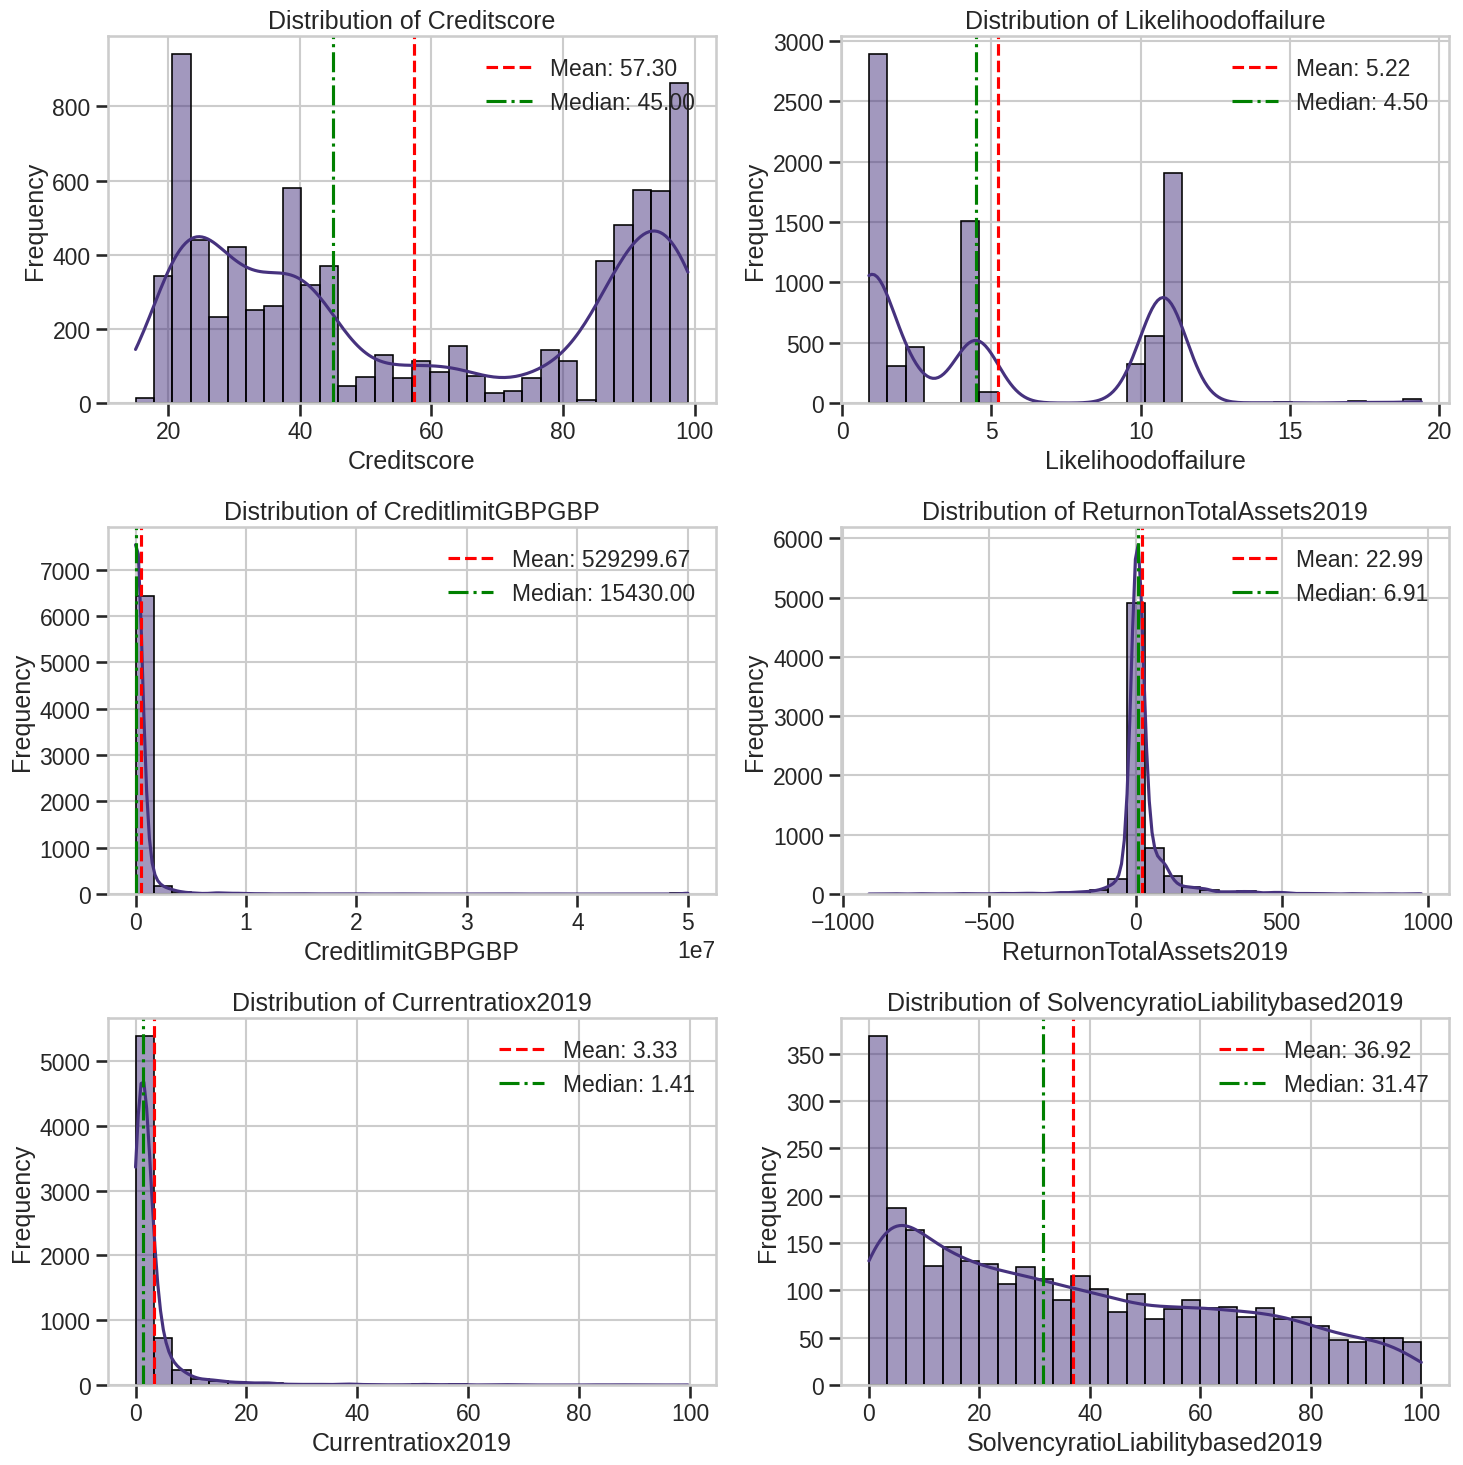

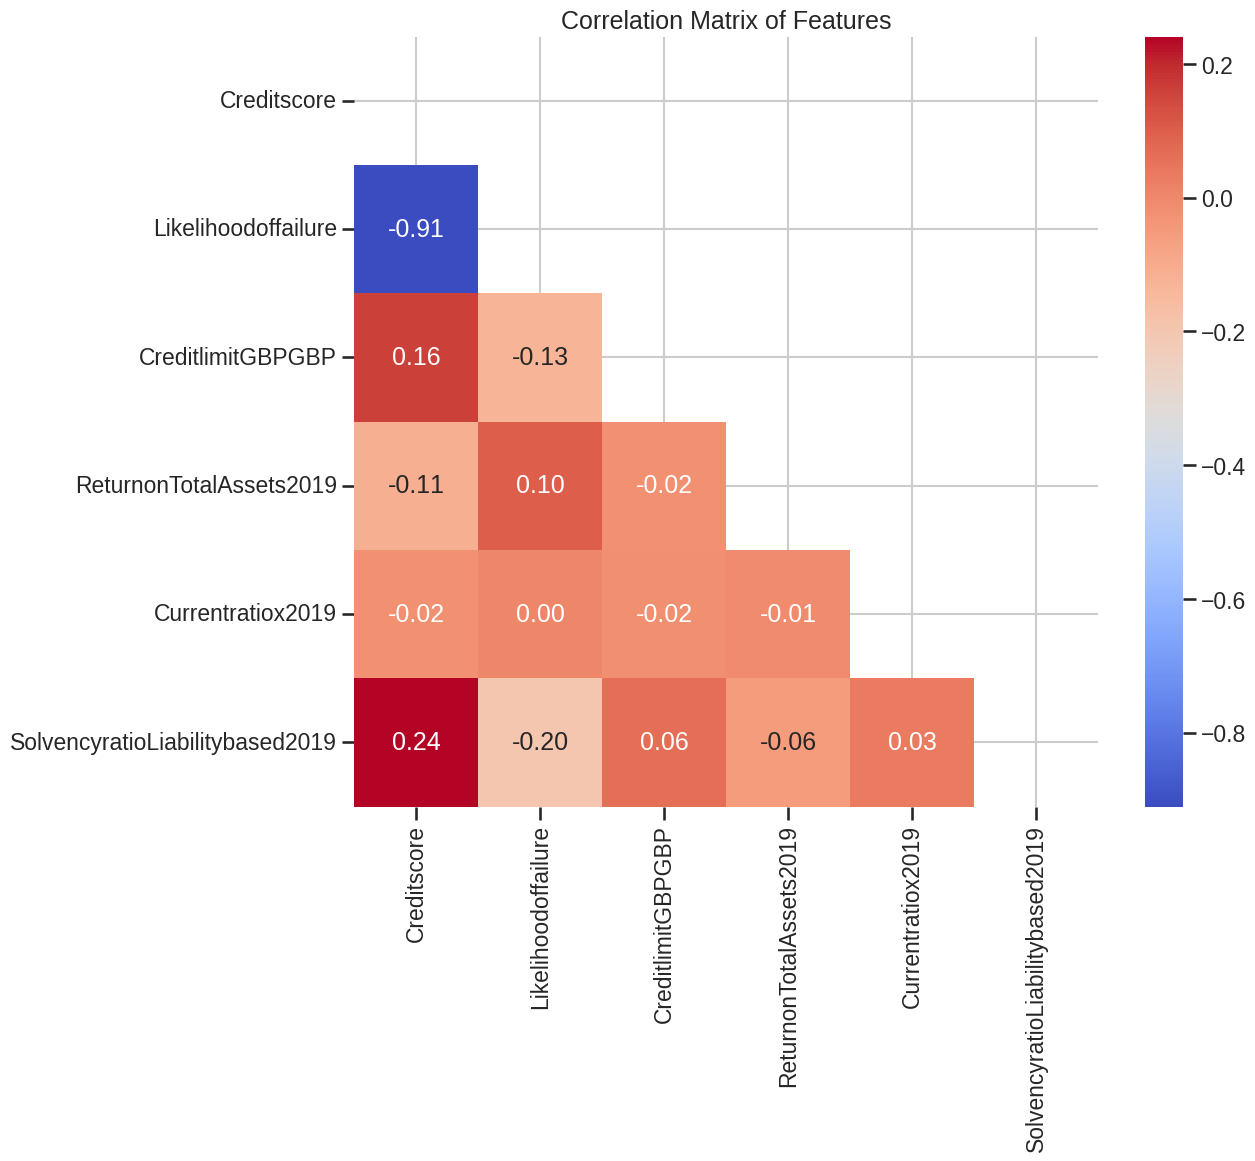

Created target variable 'Creditscore_Level' using threshold: 57.300513698630134
Class distribution:
Creditscore_Level
0    55.381605
1    44.618395
Name: proportion, dtype: float64

Working with 71 numerical features
Training set: 5723 samples
Testing set: 2453 samples

Imputing missing values using KNN...
Scaling features...

Training and evaluating Decision Tree...
Decision Tree CV accuracy: 0.9846 ± 0.0029
Decision Tree Test Accuracy: 0.9747

Training and evaluating Random Forest...
Random Forest CV accuracy: 0.9932 ± 0.0019
Random Forest Test Accuracy: 0.9910

Training and evaluating SVM...
SVM CV accuracy: 0.5967 ± 0.0118
SVM Test Accuracy: 0.5903

Training and evaluating Logistic Regression...
Logistic Regression CV accuracy: 0.9130 ± 0.0087
Logistic Regression Test Accuracy: 0.8989


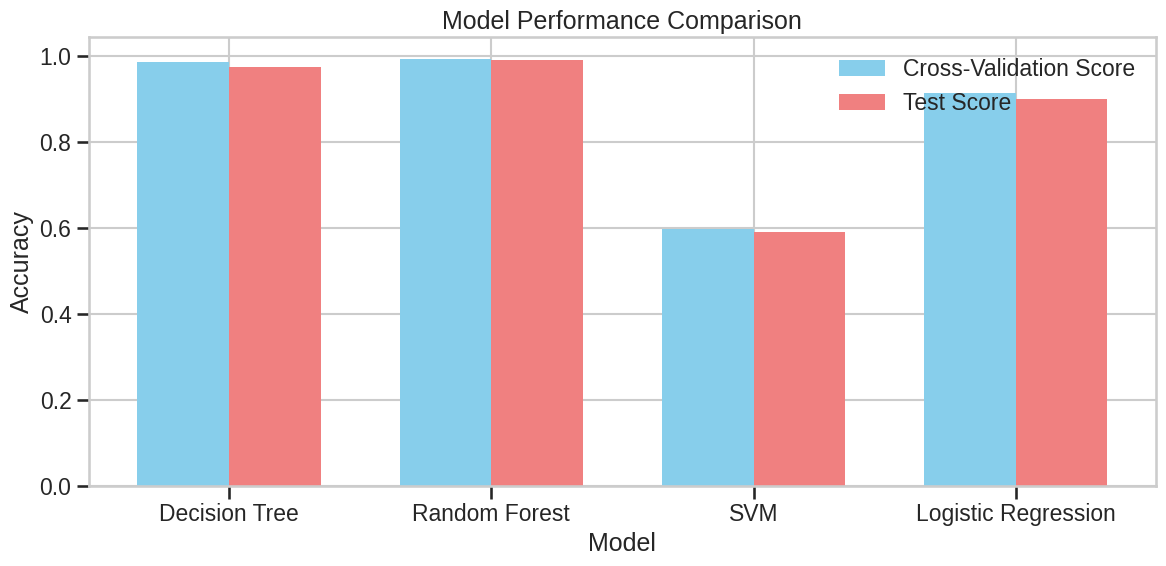

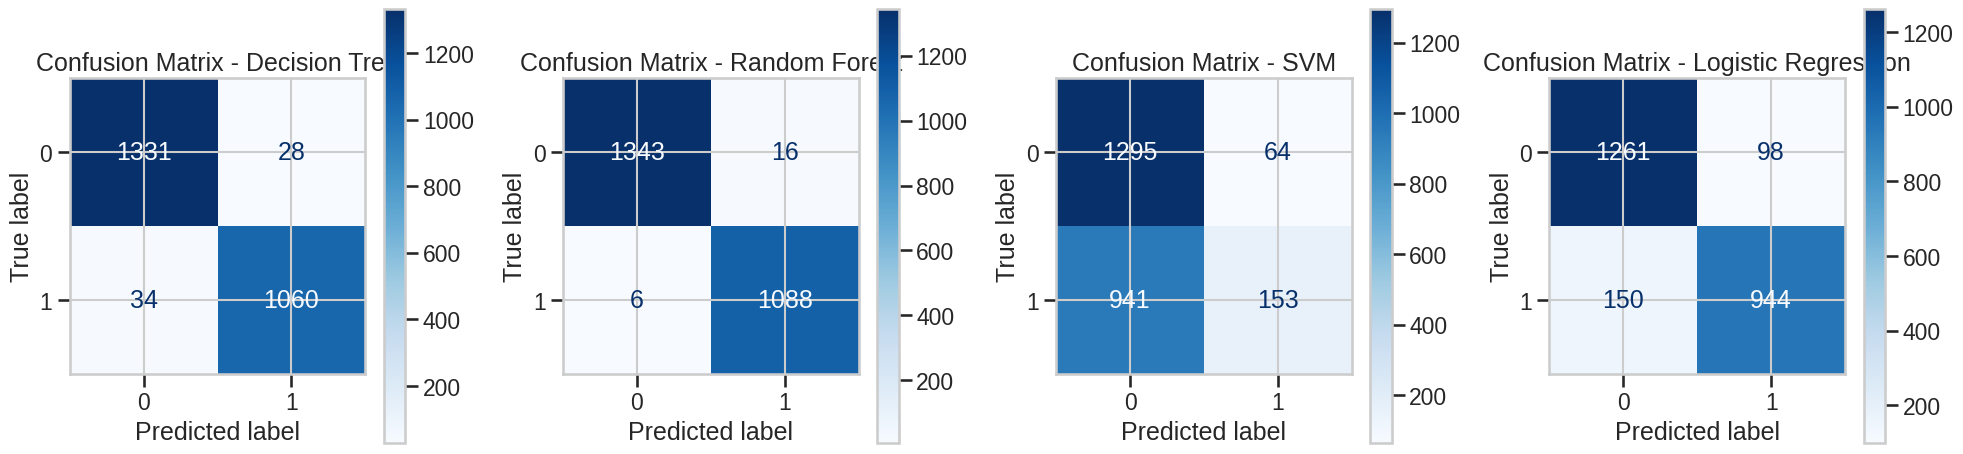

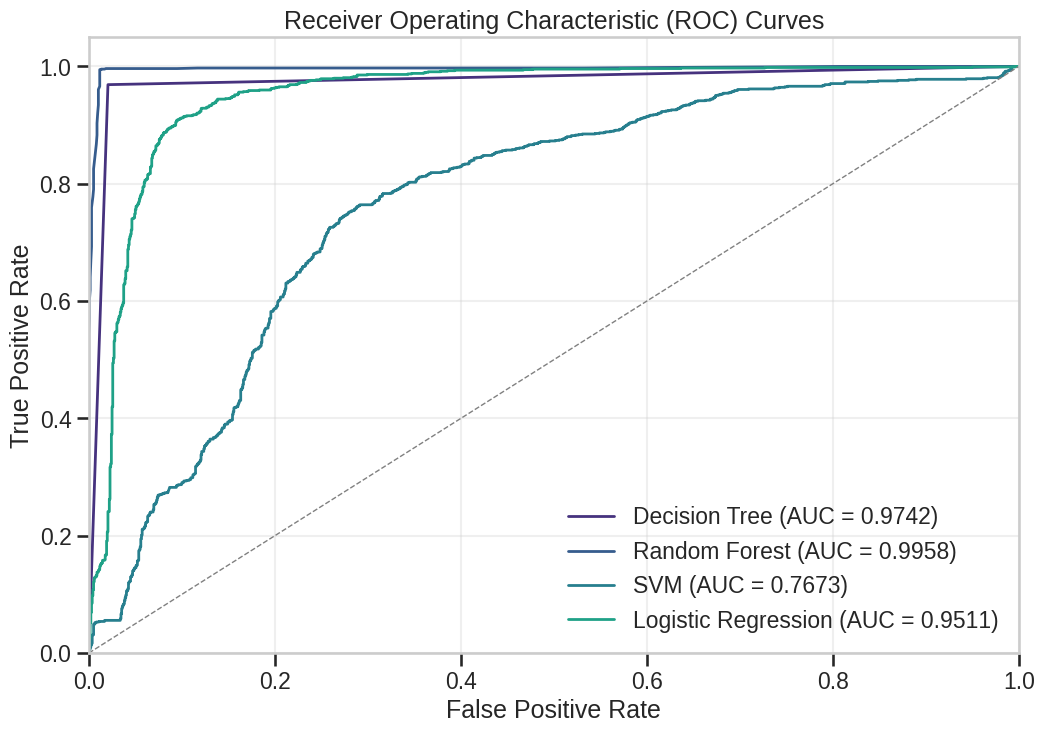

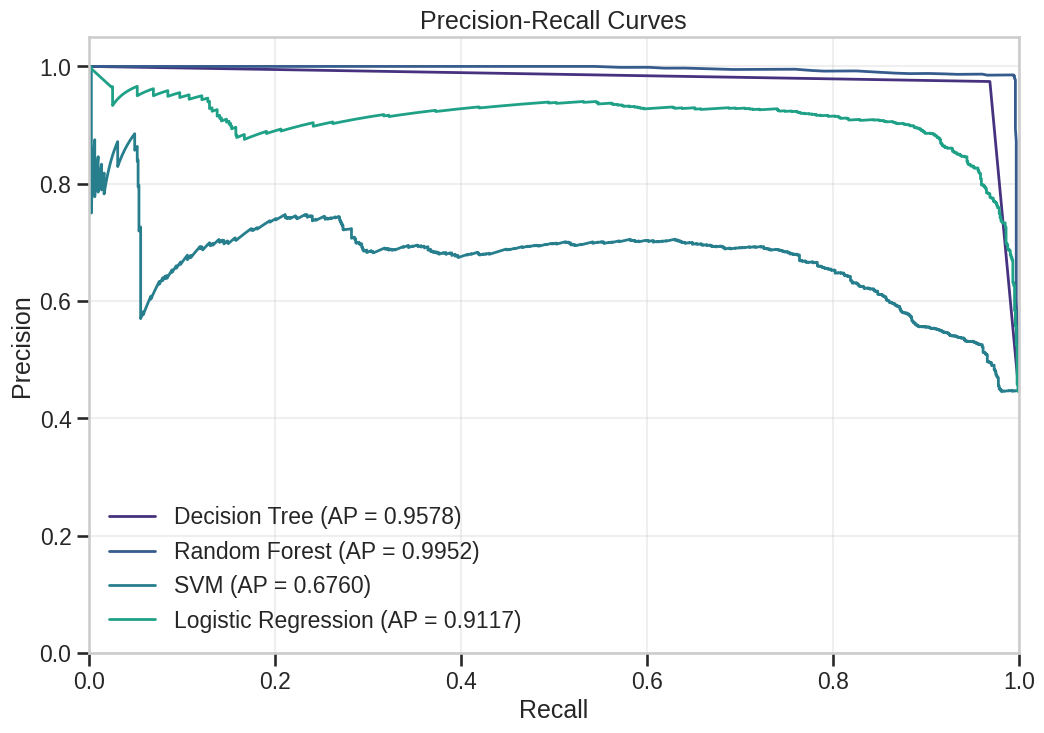


Best performing model: Random Forest

Top 15 most important features:
                        Feature  Importance
0           Likelihoodoffailure    0.367728
1             CreditlimitGBPGBP    0.098173
2           Previouscreditscore    0.083221
26         TotalAssetsthGBP2019    0.043777
34  CurrentLiabilitiesthGBP2019    0.035847
60   ShareholdersFundsthGBP2019    0.031372
32       CurrentAssetsthGBP2019    0.030458
13      TradeCreditorsthGBP2020    0.030129
10            TurnoverthGBP2019    0.023310
20         NetCurrentAssets2019    0.018529
14      TradeCreditorsthGBP2019    0.018437
22         FixedAssetsthGBP2019    0.016391
18            StockWIPthGBP2019    0.015785
56        BankDepositsthGBP2019    0.013088
43        InterestPaidthGBP2020    0.010455


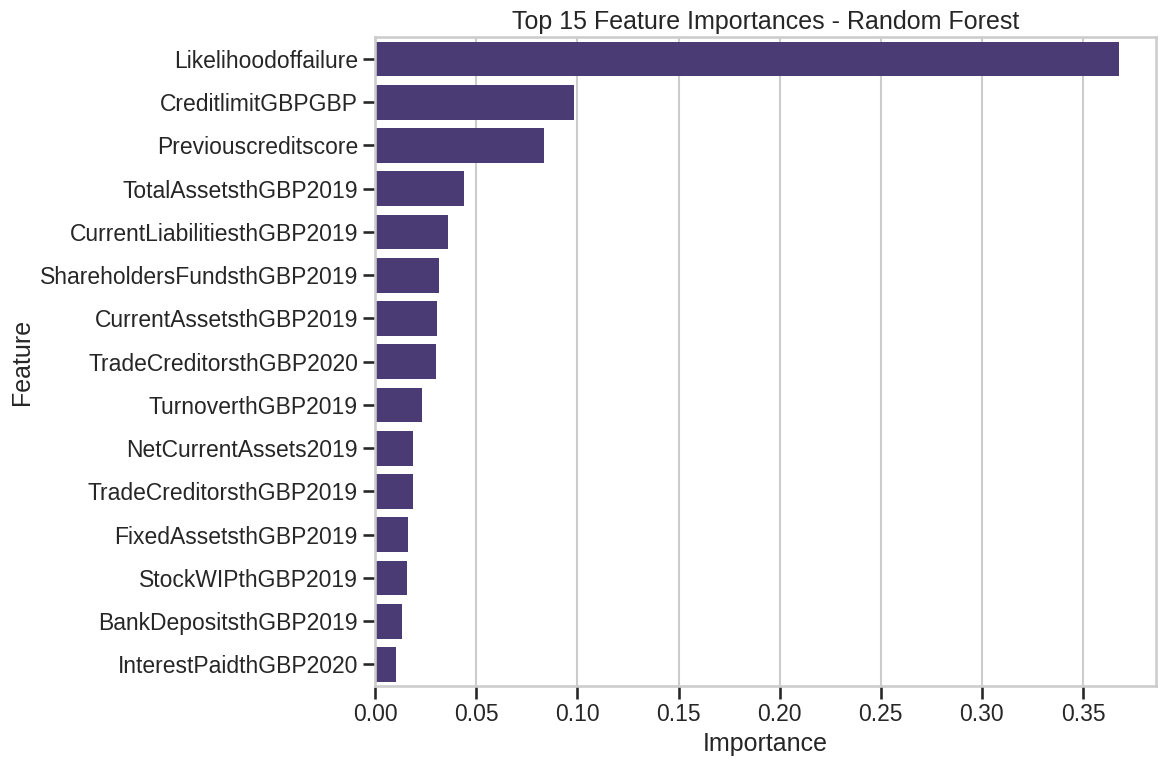


Performing hyperparameter tuning...
Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best cross-validation score: 0.9932

Final model evaluation:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1359
           1       0.99      0.99      0.99      1094

    accuracy                           0.99      2453
   macro avg       0.99      0.99      0.99      2453
weighted avg       0.99      0.99      0.99      2453


Analysis complete!


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.impute import KNNImputer
from sklearn.inspection import permutation_importance
import warnings
warnings.filterwarnings('ignore')

# Set styling for plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")
sns.set_context("talk")

# Define a function for loading and initial preprocessing
def load_and_preprocess_data(file_path):
    """
    Load data and perform initial preprocessing steps
    """
    print("Loading data...")
    df = pd.read_csv(file_path)
    print(f"Data loaded with {df.shape[0]} rows and {df.shape[1]} columns")

    # Display basic info
    print("\nBasic information about the dataset:")
    print(f"Number of missing values per column (top 10):\n{df.isna().sum().sort_values(ascending=False).head(10)}")

    return df

# Define a function for exploring features
def explore_features(df, feature_list, target=None):
    """
    Perform exploratory data analysis on specified features
    """
    print(f"\nExploratory Data Analysis for selected features:")

    # Summary statistics
    summary_stats = df[feature_list].describe().T
    print("\nSummary statistics:")
    print(summary_stats)

    # Distribution plots
    n_features = len(feature_list)
    fig_rows = (n_features + 1) // 2  # Calculate number of rows needed

    plt.figure(figsize=(15, 5 * fig_rows))
    for i, feature in enumerate(feature_list):
        plt.subplot(fig_rows, 2, i+1)
        sns.histplot(df[feature].dropna(), kde=True, bins=30)
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')

        # Add a vertical line for the mean
        plt.axvline(df[feature].mean(), color='red', linestyle='--', label=f'Mean: {df[feature].mean():.2f}')
        plt.axvline(df[feature].median(), color='green', linestyle='-.', label=f'Median: {df[feature].median():.2f}')
        plt.legend()

    plt.tight_layout()
    plt.show()

    # If target is provided, explore relationship with target
    if target and target in df.columns:
        plt.figure(figsize=(15, 5 * fig_rows))
        for i, feature in enumerate(feature_list):
            plt.subplot(fig_rows, 2, i+1)
            if df[target].nunique() <= 5:  # If target is categorical with few categories
                sns.boxplot(x=target, y=feature, data=df)
                plt.title(f'Distribution of {feature} by {target}')
            else:
                sns.scatterplot(x=feature, y=target, data=df, alpha=0.5)
                plt.title(f'Relationship between {feature} and {target}')

        plt.tight_layout()
        plt.show()

    # Correlation matrix for numerical features
    if len(feature_list) > 1:
        plt.figure(figsize=(12, 10))
        correlation_matrix = df[feature_list].corr()
        mask = np.triu(correlation_matrix)
        sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", mask=mask)
        plt.title('Correlation Matrix of Features')
        plt.show()

# Create target variable function
def create_target_variable(df, source_column, method='mean', threshold=None):
    """
    Create a binary target variable based on a source column

    Parameters:
    df (DataFrame): Input dataframe
    source_column (str): Column used to create the target
    method (str): Method to determine threshold ('mean', 'median', or 'custom')
    threshold (float): Custom threshold value if method is 'custom'

    Returns:
    tuple: (Modified dataframe, threshold value used)
    """
    if method == 'mean':
        threshold_value = df[source_column].mean()
    elif method == 'median':
        threshold_value = df[source_column].median()
    elif method == 'custom' and threshold is not None:
        threshold_value = threshold
    else:
        raise ValueError("Invalid method or missing threshold for custom method")

    # Create target variable
    target_column = f"{source_column}_Level"
    df[target_column] = (df[source_column] > threshold_value).astype(int)

    print(f"Created target variable '{target_column}' using threshold: {threshold_value}")
    print(f"Class distribution:\n{df[target_column].value_counts(normalize=True) * 100}")

    return df, threshold_value

# Imputation function
def impute_missing_values(X, strategy='knn', n_neighbors=5):
    """
    Impute missing values using various strategies

    Parameters:
    X (DataFrame): Features dataframe
    strategy (str): Imputation strategy ('mean', 'median', 'knn')
    n_neighbors (int): Number of neighbors for KNN imputation

    Returns:
    DataFrame: Imputed dataframe
    """
    X_copy = X.copy()

    if strategy == 'mean':
        return X_copy.fillna(X_copy.mean())

    elif strategy == 'median':
        return X_copy.fillna(X_copy.median())

    elif strategy == 'knn':
        imputer = KNNImputer(n_neighbors=n_neighbors)
        imputed_array = imputer.fit_transform(X_copy)
        return pd.DataFrame(imputed_array, columns=X_copy.columns, index=X_copy.index)

    else:
        raise ValueError("Invalid imputation strategy")

# Feature importance analysis
def analyze_feature_importance(model, X, y, method='built_in', n_repeats=10):
    """
    Analyze feature importance using different methods

    Parameters:
    model: Trained model
    X (DataFrame): Features
    y (Series): Target variable
    method (str): Method to use ('built_in' or 'permutation')
    n_repeats (int): Number of repeats for permutation importance

    Returns:
    DataFrame: Feature importance dataframe
    """
    if method == 'built_in':
        if hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
        elif hasattr(model, 'coef_'):
            importances = np.abs(model.coef_[0])
        else:
            raise ValueError("Model doesn't have built-in feature importance")

    elif method == 'permutation':
        result = permutation_importance(model, X, y, n_repeats=n_repeats, random_state=42)
        importances = result.importances_mean

    else:
        raise ValueError("Invalid feature importance method")

    # Create and return DataFrame
    importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    return importance_df

# Model training and evaluation
def train_and_evaluate_models(X_train, X_test, y_train, y_test, models_dict, cv=5, scoring='accuracy'):
    """
    Train multiple models and evaluate their performance

    Parameters:
    X_train, X_test, y_train, y_test: Train-test split data
    models_dict (dict): Dictionary of models to train
    cv (int): Number of cross-validation folds
    scoring (str): Scoring metric for cross-validation

    Returns:
    dict: Dictionary of trained models and their performance metrics
    """
    results = {}

    for name, model in models_dict.items():
        print(f"\nTraining and evaluating {name}...")

        # Cross-validation
        cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring=scoring)
        cv_mean, cv_std = cv_scores.mean(), cv_scores.std()

        # Fit model
        model.fit(X_train, y_train)

        # Predictions
        y_pred = model.predict(X_test)
        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X_test)[:, 1]
        else:
            y_proba = None

        # Calculate metrics
        report = classification_report(y_test, y_pred, output_dict=True)
        cm = confusion_matrix(y_test, y_pred)

        # ROC curve and AUC if probability estimates are available
        if y_proba is not None:
            fpr, tpr, _ = roc_curve(y_test, y_proba)
            roc_auc = auc(fpr, tpr)

            # Precision-Recall curve
            precision, recall, _ = precision_recall_curve(y_test, y_proba)
            pr_auc = average_precision_score(y_test, y_proba)
        else:
            fpr, tpr, roc_auc = None, None, None
            precision, recall, pr_auc = None, None, None

        # Store results
        results[name] = {
            'model': model,
            'cv_mean': cv_mean,
            'cv_std': cv_std,
            'report': report,
            'confusion_matrix': cm,
            'roc_curve': (fpr, tpr),
            'roc_auc': roc_auc,
            'pr_curve': (precision, recall),
            'pr_auc': pr_auc
        }

        print(f"{name} CV {scoring}: {cv_mean:.4f} ± {cv_std:.4f}")
        print(f"{name} Test Accuracy: {report['accuracy']:.4f}")

    return results

# Hyperparameter tuning
def tune_hyperparameters(X, y, model, param_grid, cv=5, scoring='accuracy'):
    """
    Perform hyperparameter tuning for a model

    Parameters:
    X, y: Features and target variable
    model: Model to tune
    param_grid (dict): Parameter grid for tuning
    cv (int): Number of cross-validation folds
    scoring (str): Scoring metric

    Returns:
    object: Best model
    """
    print(f"\nPerforming hyperparameter tuning...")

    grid_search = GridSearchCV(model, param_grid, cv=cv, scoring=scoring, n_jobs=-1)
    grid_search.fit(X, y)

    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

    return grid_search.best_estimator_

# Visualize results
def visualize_results(results):
    """
    Visualize model results with various plots

    Parameters:
    results (dict): Dictionary of model results from train_and_evaluate_models
    """
    # Model performance comparison
    model_names = list(results.keys())
    cv_scores = [results[name]['cv_mean'] for name in model_names]
    test_scores = [results[name]['report']['accuracy'] for name in model_names]

    plt.figure(figsize=(12, 6))
    bar_width = 0.35
    index = np.arange(len(model_names))

    plt.bar(index, cv_scores, bar_width, label='Cross-Validation Score', color='skyblue')
    plt.bar(index + bar_width, test_scores, bar_width, label='Test Score', color='lightcoral')

    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.title('Model Performance Comparison')
    plt.xticks(index + bar_width / 2, model_names)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Confusion matrices
    n_models = len(model_names)
    fig, axes = plt.subplots(1, n_models, figsize=(5 * n_models, 5))
    if n_models == 1:
        axes = [axes]

    for i, name in enumerate(model_names):
        cm = results[name]['confusion_matrix']
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap='Blues', ax=axes[i], values_format='d')
        axes[i].set_title(f"Confusion Matrix - {name}")

    plt.tight_layout()
    plt.show()

    # ROC curves
    plt.figure(figsize=(12, 8))

    for name in model_names:
        if results[name]['roc_curve'][0] is not None:
            fpr, tpr = results[name]['roc_curve']
            roc_auc = results[name]['roc_auc']
            plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.4f})')

    plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curves')
    plt.legend(loc="lower right")
    plt.grid(True, alpha=0.3)
    plt.show()

    # Precision-Recall curves
    plt.figure(figsize=(12, 8))

    for name in model_names:
        if results[name]['pr_curve'][0] is not None:
            precision, recall = results[name]['pr_curve']
            pr_auc = results[name]['pr_auc']
            plt.plot(recall, precision, lw=2, label=f'{name} (AP = {pr_auc:.4f})')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curves')
    plt.legend(loc="lower left")
    plt.grid(True, alpha=0.3)
    plt.show()

# Main execution
def main():
    # Load data
    file_path = "https://raw.githubusercontent.com/KorvenDalas/AI-ML-FS/refs/heads/main/EM.csv"
    df = load_and_preprocess_data(file_path)

    # Explore key features for understanding credit status
    important_features = ['Creditscore', 'Likelihoodoffailure', 'CreditlimitGBPGBP',
                          'ReturnonTotalAssets2019', 'Currentratiox2019', 'SolvencyratioLiabilitybased2019']
    explore_features(df, important_features)

    # Create target variable
    df, threshold = create_target_variable(df, 'Creditscore', method='mean')

    # Keep only numerical features and prepare data
    df_numeric = df.select_dtypes(include=[np.number])
    print(f"\nWorking with {df_numeric.shape[1]} numerical features")

    # Drop target from features (and source of target)
    X = df_numeric.drop(columns=['Creditscore', 'Creditscore_Level'])
    y = df_numeric['Creditscore_Level']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)
    print(f"Training set: {X_train.shape[0]} samples")
    print(f"Testing set: {X_test.shape[0]} samples")

    # Handle missing values with KNN imputation
    print("\nImputing missing values using KNN...")
    X_train_imputed = impute_missing_values(X_train, strategy='knn', n_neighbors=5)
    X_test_imputed = impute_missing_values(X_test, strategy='knn', n_neighbors=5)

    # Scaling
    print("Scaling features...")
    scaler = RobustScaler()  # More robust to outliers than StandardScaler
    X_train_scaled = scaler.fit_transform(X_train_imputed)
    X_test_scaled = scaler.transform(X_test_imputed)

    # Define models to train
    models = {
        'Decision Tree': DecisionTreeClassifier(random_state=123),
        'Random Forest': RandomForestClassifier(random_state=123),
        'SVM': SVC(kernel='rbf', random_state=123, probability=True),
        'Logistic Regression': LogisticRegression(random_state=123, max_iter=1000)
    }

    # Train and evaluate models
    results = train_and_evaluate_models(
        X_train_scaled, X_test_scaled, y_train, y_test,
        models, cv=5, scoring='accuracy'
    )

    # Visualize results
    visualize_results(results)

    # Find best performing model
    best_model_name = max(results, key=lambda k: results[k]['cv_mean'])
    best_model = results[best_model_name]['model']
    print(f"\nBest performing model: {best_model_name}")

    # Analyze feature importance of best model
    importance_df = analyze_feature_importance(best_model, pd.DataFrame(X_train_scaled, columns=X_train.columns), y_train)
    print("\nTop 15 most important features:")
    print(importance_df.head(15))

    # Visualize feature importance
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=importance_df.head(15))
    plt.title(f'Top 15 Feature Importances - {best_model_name}')
    plt.tight_layout()
    plt.show()

    # Experiment: Removing 'Likelihoodoffailure' if it's too dominant
    if 'Likelihoodoffailure' in importance_df['Feature'].values:
        if importance_df.loc[importance_df['Feature'] == 'Likelihoodoffailure', 'Importance'].values[0] > 0.5:
            print("\nExperiment: Removing dominant feature 'Likelihoodoffailure'...")

            # Drop Likelihoodoffailure
            X_train_reduced = X_train.drop(columns=['Likelihoodoffailure'])
            X_test_reduced = X_test.drop(columns=['Likelihoodoffailure'])

            # Impute and scale
            X_train_reduced_imputed = impute_missing_values(X_train_reduced, strategy='knn')
            X_test_reduced_imputed = impute_missing_values(X_test_reduced, strategy='knn')

            scaler_reduced = RobustScaler()
            X_train_reduced_scaled = scaler_reduced.fit_transform(X_train_reduced_imputed)
            X_test_reduced_scaled = scaler_reduced.transform(X_test_reduced_imputed)

            # Train and evaluate with reduced feature set
            reduced_results = train_and_evaluate_models(
                X_train_reduced_scaled, X_test_reduced_scaled, y_train, y_test,
                models, cv=5, scoring='accuracy'
            )

            # Visualize reduced results
            visualize_results(reduced_results)

            # Feature importance without Likelihoodoffailure
            best_reduced_model_name = max(reduced_results, key=lambda k: reduced_results[k]['cv_mean'])
            best_reduced_model = reduced_results[best_reduced_model_name]['model']

            # Analyze feature importance
            importance_reduced_df = analyze_feature_importance(
                best_reduced_model,
                pd.DataFrame(X_train_reduced_scaled, columns=X_train_reduced.columns),
                y_train
            )

            print("\nTop 15 most important features (without Likelihoodoffailure):")
            print(importance_reduced_df.head(15))

            # Visualize feature importance
            plt.figure(figsize=(12, 8))
            sns.barplot(x='Importance', y='Feature', data=importance_reduced_df.head(15))
            plt.title(f'Top 15 Feature Importances - {best_reduced_model_name} (without Likelihoodoffailure)')
            plt.tight_layout()
            plt.show()

    # Hyperparameter tuning for best model
    if best_model_name == 'Decision Tree':
        param_grid = {
            'max_depth': [None, 5, 10, 15, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    elif best_model_name == 'Random Forest':
        param_grid = {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10]
        }
    elif best_model_name == 'SVM':
        param_grid = {
            'C': [0.1, 1, 10, 100],
            'gamma': ['scale', 'auto', 0.1, 0.01]
        }
    elif best_model_name == 'Logistic Regression':
        param_grid = {
            'C': [0.01, 0.1, 1, 10, 100],
            'solver': ['liblinear', 'lbfgs', 'saga']
        }

    # Tune hyperparameters for best model
    tuned_model = tune_hyperparameters(
        X_train_scaled, y_train,
        models[best_model_name], param_grid,
        cv=5, scoring='accuracy'
    )

    # Final evaluation of tuned model
    y_pred_tuned = tuned_model.predict(X_test_scaled)
    final_report = classification_report(y_test, y_pred_tuned)
    print("\nFinal model evaluation:")
    print(final_report)

    print("\nAnalysis complete!")

if __name__ == "__main__":
    main()

# Appendix - SVM Expansion

Calibrating SVM - **Skip the code due to high computational Power**


Exploratory Data Analysis for selected features:

Summary statistics:
                                  count           mean           std  \
Creditscore                      8176.0      57.300514  2.973099e+01   
Likelihoodoffailure              8107.0       5.222030  4.402007e+00   
CreditlimitGBPGBP                6771.0  529299.672574  2.983264e+06   
ReturnonTotalAssets2019          6773.0      22.988502  1.054847e+02   
Currentratiox2019                6724.0       3.331513  7.609185e+00   
SolvencyratioLiabilitybased2019  3075.0      36.916356  2.861194e+01   

                                        min         25%           50%  \
Creditscore                       15.000000   29.000000     45.000000   
Likelihoodoffailure                0.900000    0.900000      4.500000   
CreditlimitGBPGBP                500.000000  500.000000  15430.000000   
ReturnonTotalAssets2019         -912.765957    0.058547      6.909952   
Currentratiox2019                  0.000002    0.918068    

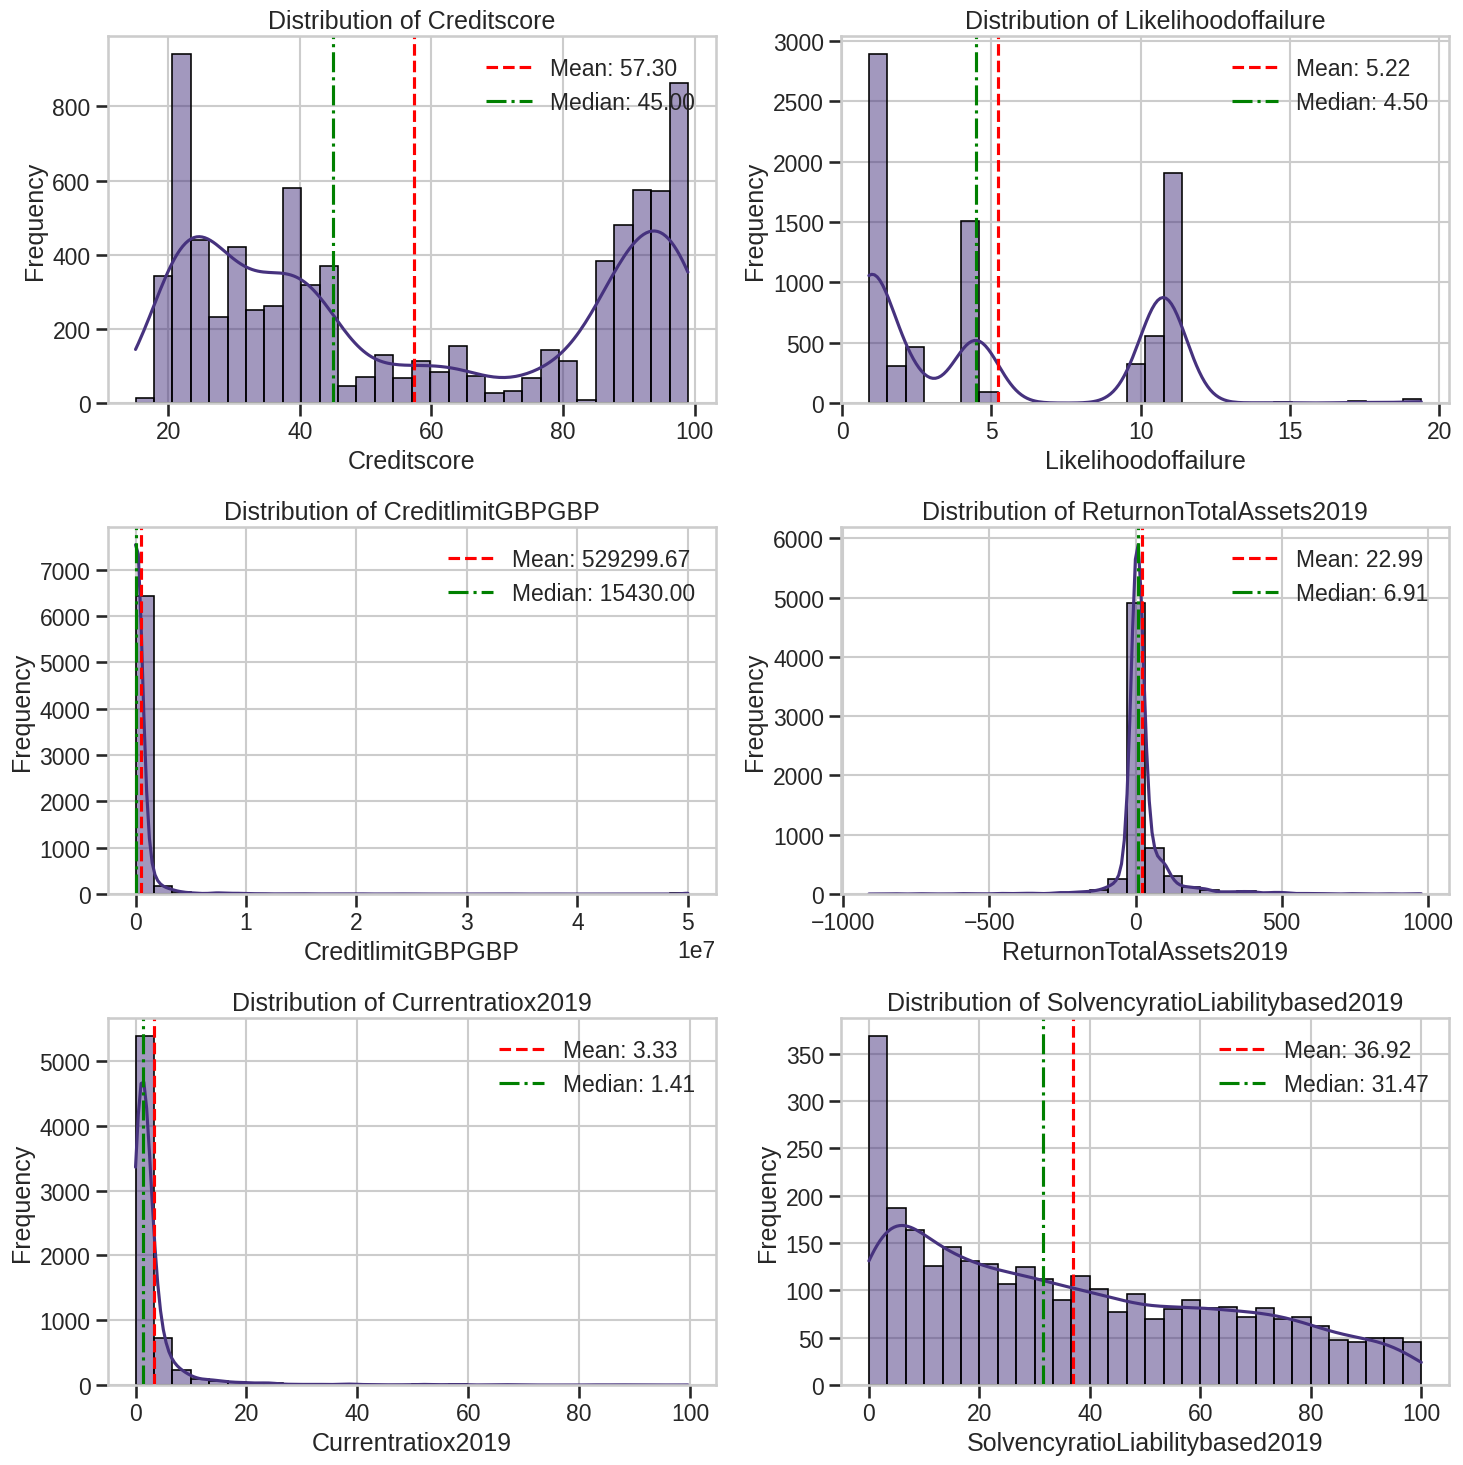

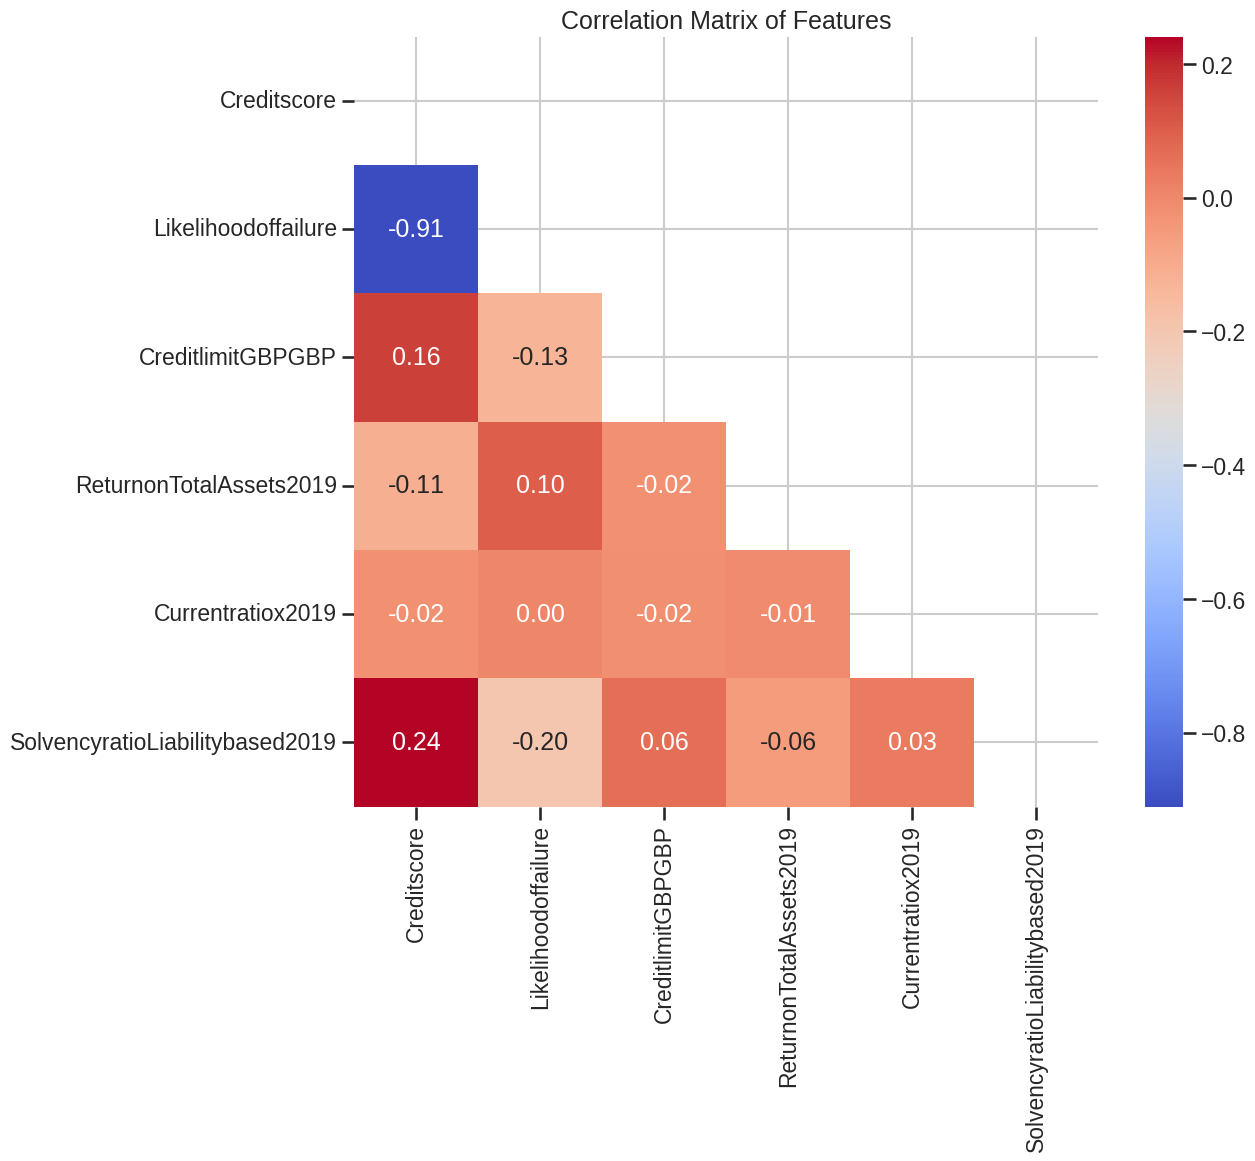

Created target variable 'Creditscore_Level' using threshold: 57.300513698630134
Class distribution:
Creditscore_Level
0    55.381605
1    44.618395
Name: proportion, dtype: float64

Working with 71 numerical features
Training set: 5723 samples
Testing set: 2453 samples
Scaling features...
Evaluating SVM...
Best parameters: {'C': 100, 'gamma': 0.001}
Best parameters: C=100 and Gamma=0.001


In [18]:
#%%   THIS Code require around 25 minutes to run. The results are displayable at the end of this code section.
#EXTRA: CALIBRATING SVM
important_features = ['Creditscore', 'Likelihoodoffailure', 'CreditlimitGBPGBP',
                      'ReturnonTotalAssets2019', 'Currentratiox2019', 'SolvencyratioLiabilitybased2019']

explore_features(df, important_features)
df, threshold = create_target_variable(df, 'Creditscore', method='mean')

df_numeric = df.select_dtypes(include=[np.number])
print(f"\nWorking with {df_numeric.shape[1]} numerical features")

X = df_numeric.drop(columns=['Creditscore', 'Creditscore_Level'])
X=X.fillna(X.mean())
y = df_numeric['Creditscore_Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")


print("Scaling features...")
scaler = RobustScaler()  # More robust to outliers than StandardScaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for C and gamma
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 'scale', 'auto']}
print("Evaluating SVM...")
svc = SVC(kernel='rbf', random_state=123, probability=True)

# Set up grid search with 5-fold cross-validation
grid_search = GridSearchCV(svc, param_grid, cv=5)

# Fitting the model
grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best parameters: C=100 and Gamma=0.001")

Loading data...
Data loaded with 8176 rows and 72 columns

Basic information about the dataset:
Number of missing values per column (top 10):
CapitalExpenditure2020             7957
IntangibleAssetsthGBP2020          7675
LongTermDebtthGBP2020              7387
InterestCoverx2020                 7249
StockTurnoverx2020                 7247
InterestPaidthGBP2020              7182
StockWIPthGBP2020                  7102
ShortTermLoansOverdrafts2020       6819
CapitalExpenditure2019             6806
SolvencyratioLiabilitybased2020    6791
dtype: int64

Exploratory Data Analysis for selected features:

Summary statistics:
                                 count           mean           std  \
Creditscore                       19.0      80.684211  2.486643e+01   
Likelihoodoffailure               19.0       2.700000  3.855732e+00   
CreditlimitGBPGBP                 19.0  532051.842105  1.040946e+06   
ReturnonTotalAssets2019           19.0       4.121135  6.030787e+00   
Currentratiox2019  

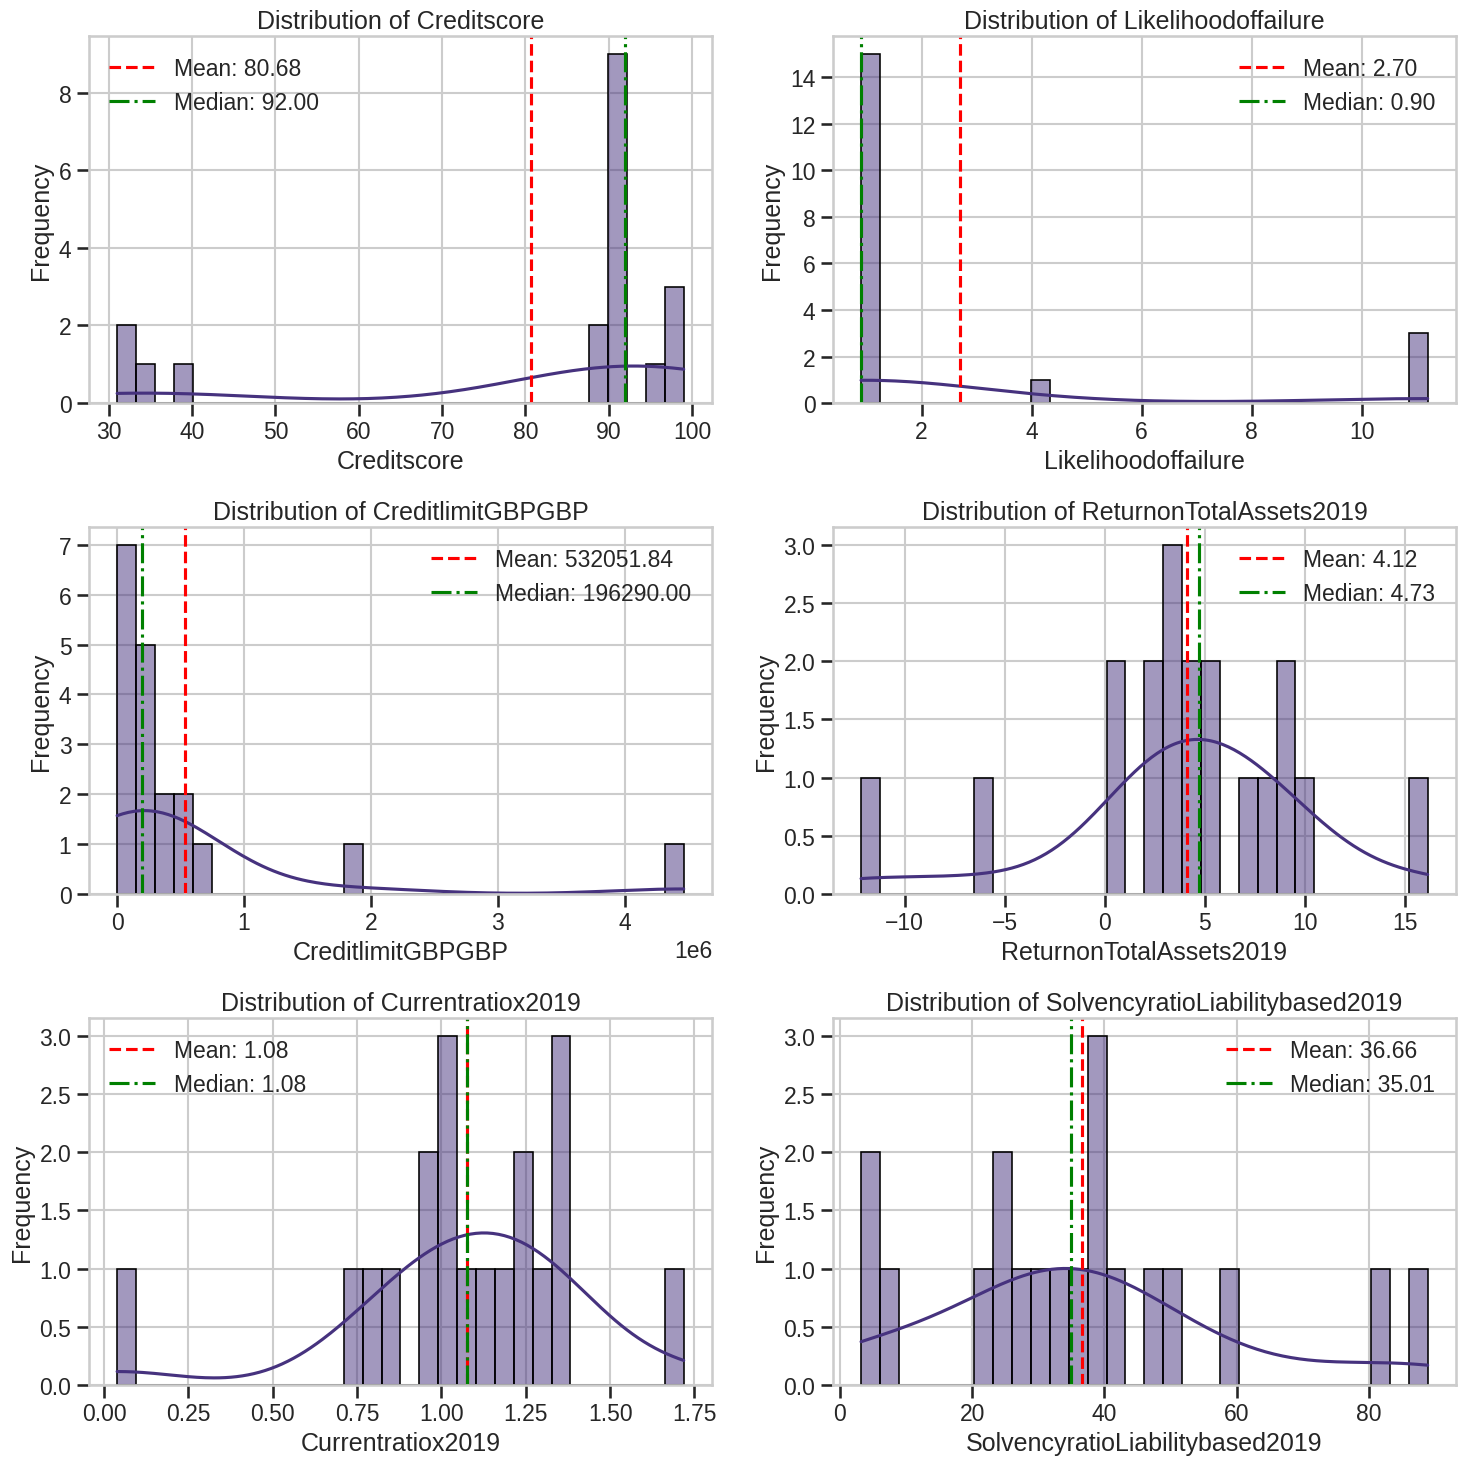

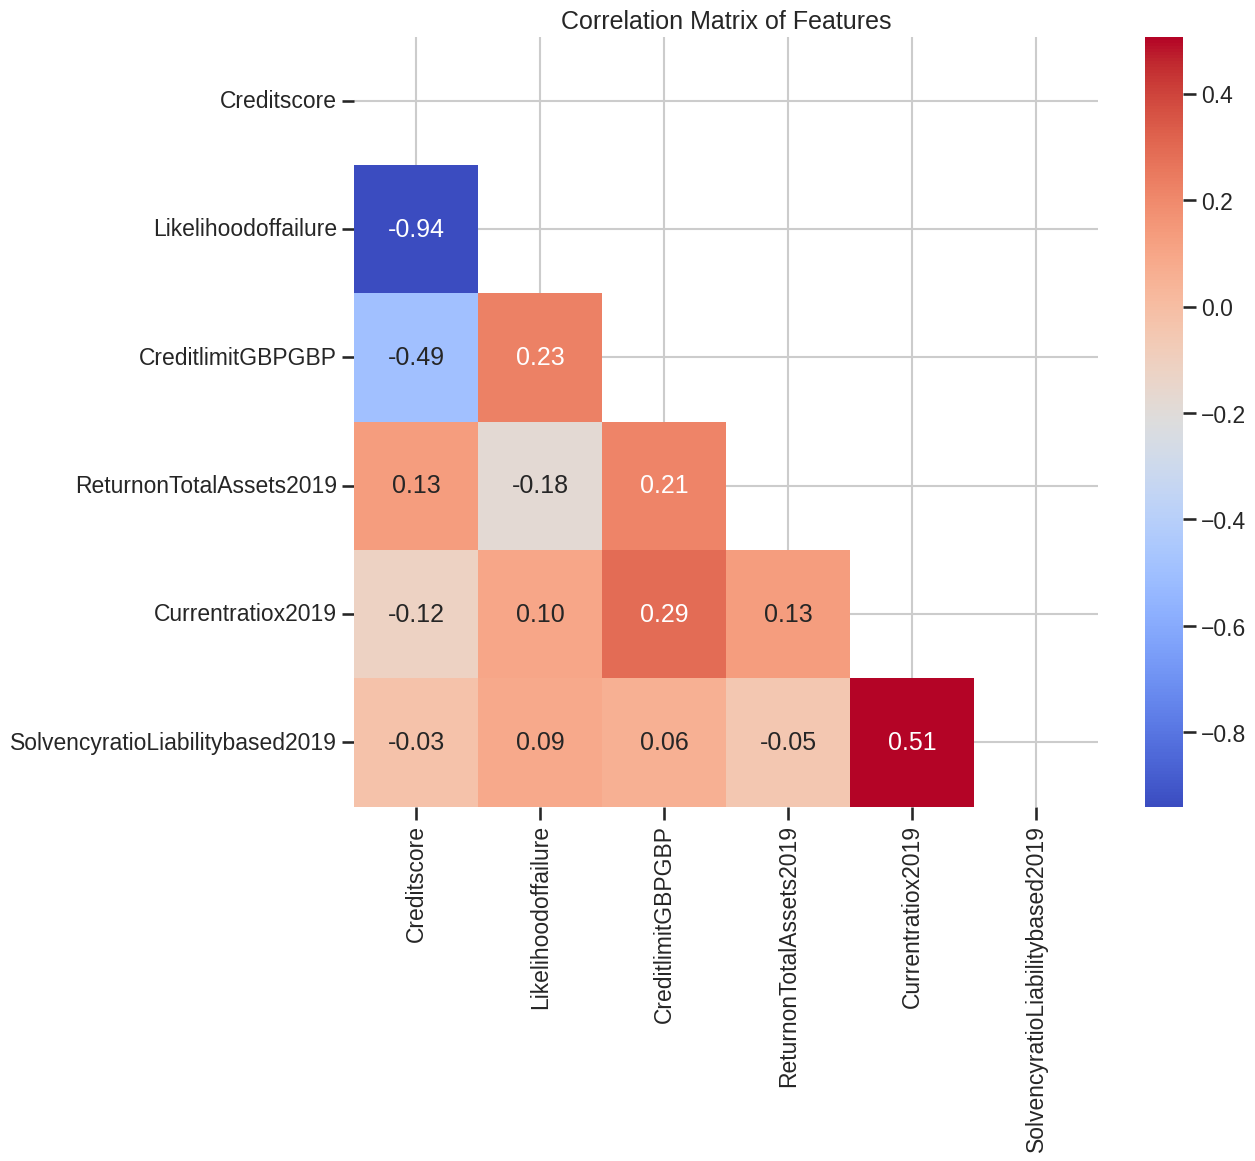

Created target variable 'Creditscore_Level' using threshold: 80.6842105263158
Class distribution:
Creditscore_Level
1    78.947368
0    21.052632
Name: proportion, dtype: float64

Working with 71 numerical features
Training set: 13 samples
Testing set: 6 samples
Mean accuracy: 0.6
Given that the accuracy is close to 50% we can conclude that the two samples have the same distribution!
Silhouette Score: 0.6283030379738659


In [20]:
#%% APPENDIX  A
  #TESTING IF ORIGINAL TRAIN AND TEST SAMPLES HAVE SAME DISTRIBUTION without considering the missing values!
url = "https://raw.githubusercontent.com/Rickeagle/Credit-Worthiness.-Study-case-in-the-UK/main/EM.csv"
file_path = url
df = load_and_preprocess_data(file_path)
important_features = ['Creditscore', 'Likelihoodoffailure', 'CreditlimitGBPGBP',
                        'ReturnonTotalAssets2019', 'Currentratiox2019', 'SolvencyratioLiabilitybased2019']
df2=df.dropna()
explore_features(df2, important_features)
df2, threshold2 = create_target_variable(df2, 'Creditscore', method='mean')
df2_numeric = df2.select_dtypes(include=[np.number])
print(f"\nWorking with {df2_numeric.shape[1]} numerical features")
X2 = df2_numeric.drop(columns=['Creditscore', 'Creditscore_Level'])
y2 = df2_numeric['Creditscore_Level']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=123, stratify=y2)
print(f"Training set: {X_train2.shape[0]} samples")
print(f"Testing set: {X_test2.shape[0]} samples")

X = np.concatenate([X_train2, X_test2], axis=0)
y = np.concatenate([np.zeros(len(X_train2)), np.ones(len(X_test2))])

clf2 = LogisticRegression(max_iter=1000)
accuracy2 = cross_val_score(clf2, X, y, cv=5, scoring='accuracy').mean()
print("Mean accuracy:", accuracy2)
print("Given that the accuracy is close to 50% we can conclude that the two samples have the same distribution!")


###########################################################
#%% Appendix B - UNSUPERVISED ML to understand the underlying structure of the data
# Scale the full feature set (using the X defined earlier)
scaler_full = StandardScaler()
X_scaled = scaler_full.fit_transform(X)

# Apply KMeans clustering (set n_clusters as needed, here we use 2)
kmeans = KMeans(n_clusters=2, random_state=123)
clusters = kmeans.fit_predict(X_scaled)

# Evaluate clustering quality with Silhouette Score
sil_score = silhouette_score(X_scaled, clusters)
print("Silhouette Score:", sil_score)
